In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from tqdm import tqdm
from IPython.display import clear_output
from scipy import optimize
import sympy as sm
import math

In [3]:
acolor,bcolor = 'b','r'

defaultfigsize = (15,7.5)
tripledefaultfigsize = (20,10)
smallerfigsize = (10,8)
largerfigsize = (16,8)
longerfigsize = (14,8)

thinner_line = 0.75
thicker_line = 1

In [4]:
def H(x):
    #Heaviside function
    if x > 0:
        return 1
    elif x<0:
        return 0
    
def H(x):
    #Heaviside function
    if x > 0:
        return 1
    elif x<0:
        return 0
def h1(x): # D_A
    return x[1] - x[0]
def h2(x): # D_B
    return x[3] - x[2]
    
def H1(x):
    return H(h1(x))
def H2(x):
    return H(h2(x))


def qdot(q, greedy,eps = 0.1):
    # Reward matrix when players defect/cooperate
    reward = np.array([[1,4],[0,3]])
    
    # Epislon-greedy policies when defecting/cooperating greedily
    policy = np.array([[1-eps/2,eps/2], [eps/2,1-eps/2]])

    # The coop/coop vector field is tangent to the diagonal at (qc,qc) and
    # the defect/defect vector field is tangent to the diagonal at (qd,qd).
    qd, qc = [(policy[i] * (reward @ policy[i])).dot([-1,1])/policy[i].dot([-1,1]) for i in range(2)]

    # Vector field in q coordinates when the greedy actions for each players are given by the pair 'greedy'
    # (e.g. 'greedy=(1,0)' means player one/two cooperates/defects greedily)
    pi0, pi1 = policy[greedy[0]], policy[greedy[1]]
    return np.array([pi0 * (reward @ pi1 - q[0]), pi1 * (reward @ pi0 - q[1])]).reshape(4,)

def f1(x,eps): # h1,h2< 0 i.e. both players defecting
    return qdot((x[0:2],x[2:4]), (0,0),eps)
def f2(x,eps): # h1<0,h2>0 i.e. defecting,cooperating
    return qdot((x[0:2],x[2:4]), (0,1),eps)
def f3(x,eps): # h1>0,h2<0 i.e. cooperating,defecting
    return qdot((x[0:2],x[2:4]), (1,0),eps)
def f4(x,eps): # h1,h2> 0 i.e. both players cooperating
    return qdot((x[0:2],x[2:4]), (1,1),eps)

# Euler Method

In [5]:
def IQL_vector(x,eps):
        greedyA = H1(x)
        greedyB = H2(x)
        vect = qdot((x[0:2],x[2:4]), (greedyA,greedyB),eps)
        return vect

def euler_model(tstep,T,eps=10,x0=(2.8,2.801,2.4,2.401),vector = IQL_vector):
    n = int(T/tstep)
    tt = np.linspace(0, T, n)
    yy = np.zeros((n,len(x0)))+x0
    for i,t in enumerate(tqdm(tt,position=0,leave = False,desc = 'Euler model')):
        yy[i,:] = yy[i-1,:] + tstep*vector(yy[i-1],eps)
    return yy

$\epsilon = 0.01$, $h = 10^{-3}$: Transient after 50 time units

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


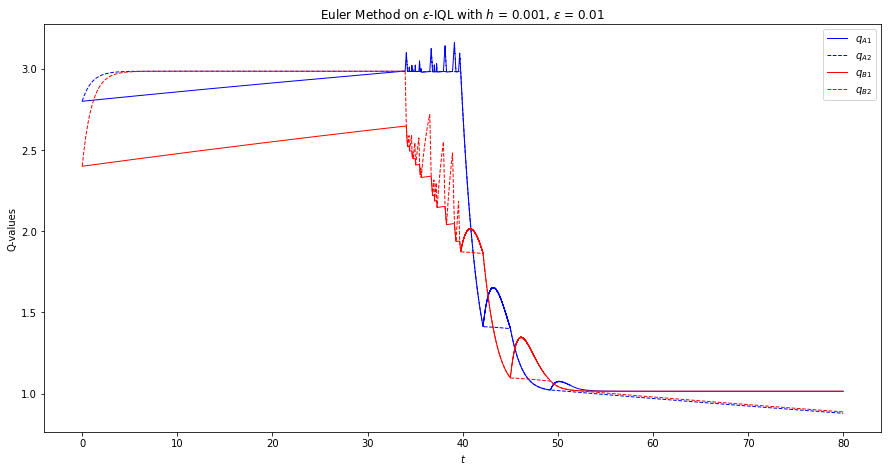

In [5]:
# Initial value
x0 = (2.8,2.801,2.4,2.401)
# Max time
T = 80
# time step (h in the notes).
tstep = 10**-3
# value of greed 
eps = 0.01
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyy = euler_model(tstep,T,eps,x0)

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyy[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thicker_line)
ax.plot(tt, yyy[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thicker_line)
ax.plot(tt, yyy[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thicker_line)
ax.plot(tt, yyy[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thicker_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')

plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}".format(tstep,eps))
ax.legend()

$\epsilon = 0.011$, $h = 10^{-3}$: Transient after 300 time units

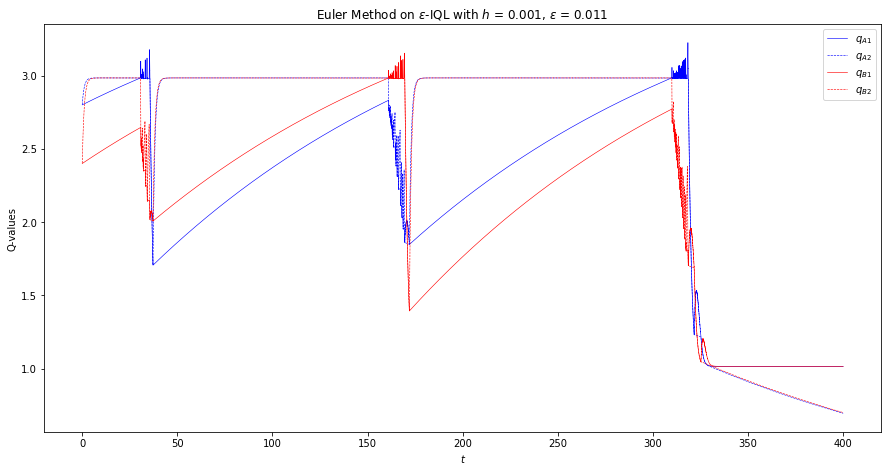

In [6]:
# Initial value
x0 = (2.8,2.801,2.4,2.401)
# Max time
T = 400
# time step (h in the notes).
tstep = 10**-3
# value of greed 
eps = 0.011
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyy = euler_model(tstep,T,eps,x0)

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyy[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')

plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}".format(tstep,eps))
ax.legend()

$\epsilon = 0.009$, $h = 10^{-3}$: Transient after 1300 time units

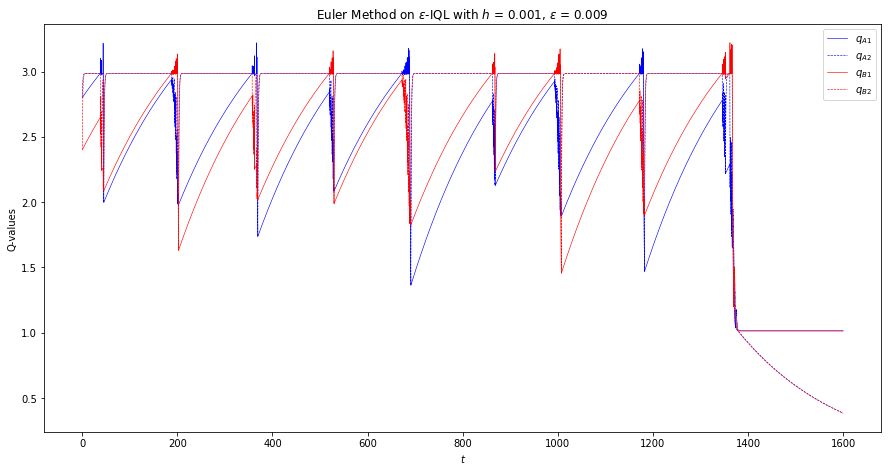

In [7]:
# Initial value
x0 = (2.8,2.801,2.4,2.401)
# Max time
T = 1600
# time step (h in the notes).
tstep = 10**-3
# value of greed 
eps = 0.009
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyy = euler_model(tstep,T,eps,x0)

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyy[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}".format(tstep,eps))
ax.legend()

$\epsilon = 0.01$, $h = 2\times10^{-3}$: Transient after 200

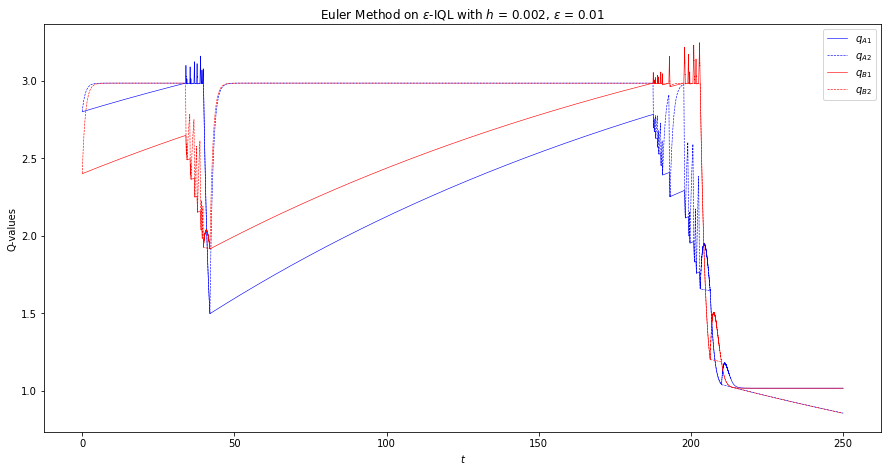

In [8]:
# Initial value
x0 = (2.8,2.801,2.4,2.401)
# Max time
T = 250
# time step (h in the notes).
tstep = 2*10**-3
# value of greed 
eps = 0.01
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyy = euler_model(tstep,T,eps,x0)

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyy[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}".format(tstep,eps))
ax.legend()

$\epsilon = 0.01$, $h = 0.25 \times 10^{-3}$: No transience even after 4000

In [558]:
# Initial value
x0 = (2.8,2.801,2.4,2.401)
# Max time
T = 4000
# time step (h in the notes).
tstep = .25*10**-3 # not transient after 3000 time units
# value of greed 
eps = 0.01
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyy = euler_model(tstep,T,eps,x0)

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyy[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
ax.plot(tt, yyy[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}".format(tstep,eps))
ax.legend()

Euler model:   8%|████▋                                                  | 1351112/16000000 [00:59<10:22, 23520.74it/s]

KeyboardInterrupt: 

$\epsilon = 0.01$, $h = 10^{-3}$, varying initial values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


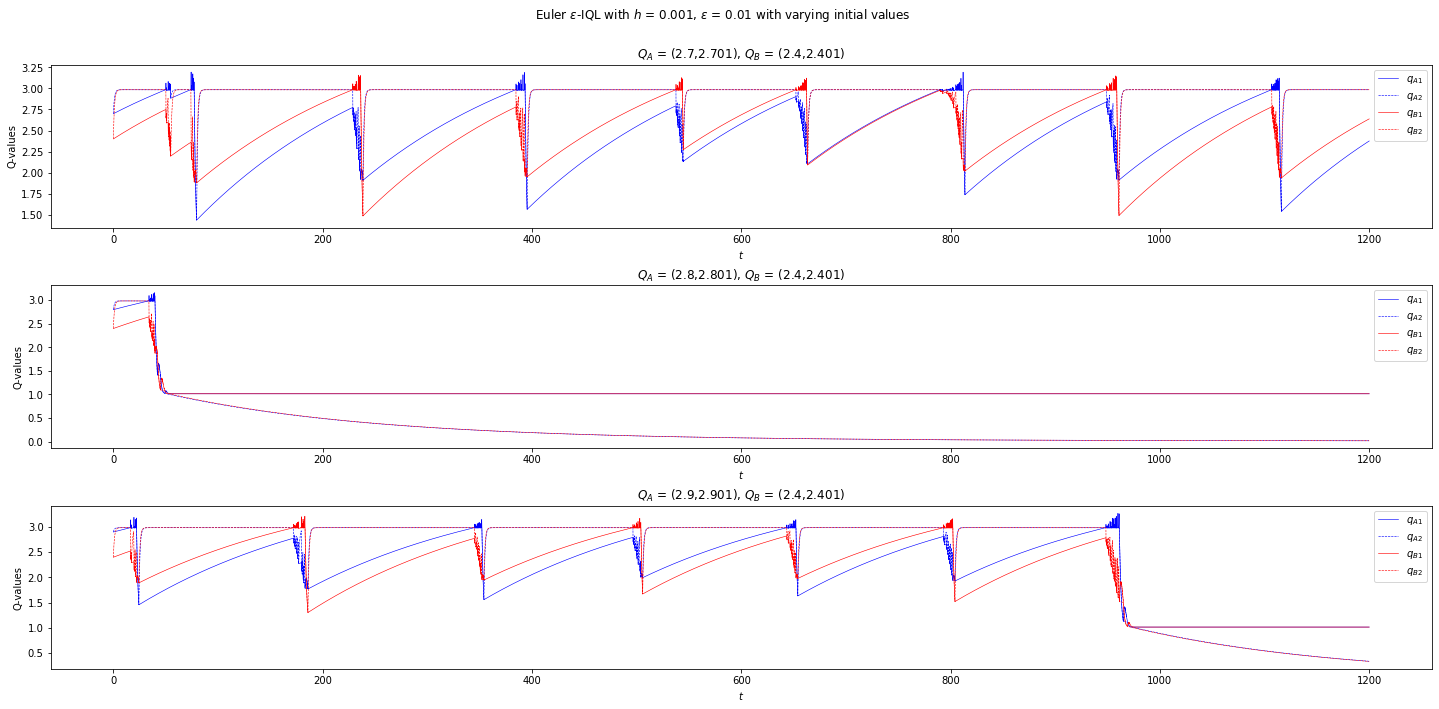

In [83]:
# Max time
T = 1200
# time step (h in the notes).
tstep = 10**-3
# value of greed 
eps = 0.01
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)

x0s = [(2.7,2.701,2.4,2.401),(2.8,2.801,2.4,2.401),(2.9,2.901,2.4,2.401)]

fig, axs = plt.subplots(3, figsize=tripledefaultfigsize)

for i,x0 in enumerate(x0s):
    yyy = euler_model(tstep,T,eps,x0)
    # Plots of each component of particle over time
    axs[i].plot(tt, yyy[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
    axs[i].plot(tt, yyy[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
    axs[i].plot(tt, yyy[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
    axs[i].plot(tt, yyy[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)
    axs[i].set_xlabel('$t$')
    axs[i].set_ylabel('Q-values')
    axs[i].legend()
    axs[i].set_title("$Q_A$ = ({},{}), $Q_B$ = ({},{})".format(x0[0],x0[1],x0[2],x0[3]))
fig.suptitle("Euler $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {} with varying initial values".format(tstep,eps))
fig.tight_layout()
fig.subplots_adjust(top=.9)

$\epsilon = 0.1$, $h = 10^{-3}$: Chaotic

Text(0.5, 1.0, 'Euler Method on $\\epsilon$-IQL with $h$ = 0.001, $\\epsilon$ = 0.1')

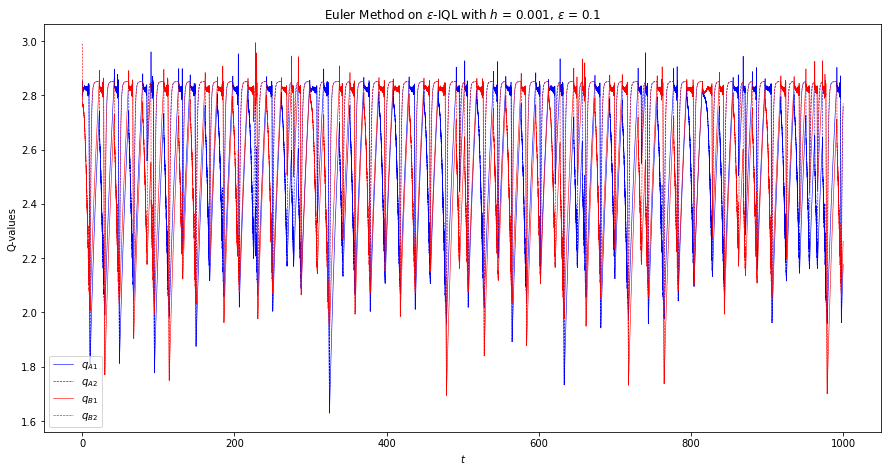

In [797]:
# Initial value
x0 = (2.8,2.801,2.845,2.99)
# Max time
T = 100
# time step (h in the notes).
tstep = 10**-3
# Value of greed 
eps = 0.1
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyychaotic = euler_model(tstep,T,eps,x0)

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyychaotic[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
ax.plot(tt, yyychaotic[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
ax.plot(tt, yyychaotic[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
ax.plot(tt, yyychaotic[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
ax.legend()
plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}".format(tstep,eps))


In [795]:
# Initial value
x0 = (2.8,2.801,2.845,2.99)
# Max time
T = 5000
# time step (h in the notes).
tstep = 10**-3
# Value of greed 
eps = 0.1
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyylong = euler_model(tstep,T,eps,x0)

Euler model:   2%|█▎                                                       | 119202/5000000 [00:04<02:48, 28906.66it/s]

KeyboardInterrupt: 

Euler $\epsilon$-IQL doesn't settle after 5k time units

In [ ]:
tmin = 4800
tmax = 5000
zoom1,zoom2 = int(tmin*n/T),int(tmax*n/T)

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt[zoom1:zoom2], yyylong[zoom1:zoom2,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
ax.plot(tt[zoom1:zoom2], yyylong[zoom1:zoom2,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
ax.plot(tt[zoom1:zoom2], yyylong[zoom1:zoom2,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
ax.plot(tt[zoom1:zoom2], yyylong[zoom1:zoom2,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}".format(tstep,eps))
ax.legend()

# Typical Behaviour and Patterns

In [6]:
# Initial value
x0 = (2.8,2.801,2.845,2.99)
# Max time
T = 100
# time step (h in the notes).
tstep = 10**-3
# Value of greed 
eps = 0.1
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyyzoom = euler_model(tstep,T,eps,x0)

Typical Cycle of Chaotic $\epsilon$-IQL

In [12]:
def zoomed_euler_twin(yyy,tmin=60,tmax=80,subtmin = 0):
    zoom1,zoom2 = int(tmin*n/T),int(tmax*n/T)
    
    fig,ax1 = plt.subplots(figsize = smallerfigsize)
    ax1.plot(tt[0:zoom2 - zoom1] + subtmin, yyy[zoom1:zoom2,0],'-',color = acolor,label='$q_{A1}$',linewidth = thicker_line)
    ax1.plot(tt[0:zoom2 - zoom1] + subtmin, yyy[zoom1:zoom2,1],'--',color = acolor,label='$q_{A2}$',linewidth = thicker_line)
    #ax1.set_ylim(xymin, xymax) 
    ax1.set_ylabel('$q_A$')
    
    ax1.legend(loc = 'upper left')
    ax1.tick_params(axis='y',labelcolor=acolor)
    
    ax2 = ax1.twinx()
    ax2.plot(tt[0:zoom2 - zoom1] + subtmin, yyy[zoom1:zoom2,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thicker_line)
    ax2.plot(tt[0:zoom2 - zoom1] + subtmin, yyy[zoom1:zoom2,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thicker_line)
    
    ax2.legend(loc ='upper right')
    ax2.tick_params(axis='y',labelcolor=bcolor)
    ax2.set_ylabel('$q_B$')
    
    ax1.set_xlabel('time t')
    plt.title("Zoomed behaviour of Euler $\epsilon$-IQL for $h$ = {}, $\epsilon$ = {}".format(tstep,eps))
    
def zoomed_euler(yyy,tmin=60,tmax=80,subtmin=0):
    zoom1,zoom2 = int(tmin*n/T),int(tmax*n/T)

    fig,ax = plt.subplots(figsize = smallerfigsize)
    ax.plot(tt[0:zoom2 - zoom1]+subtmin, yyy[zoom1:zoom2,0],'-',color = acolor,label='$q_{A1}$',linewidth = thicker_line)
    ax.plot(tt[0:zoom2 - zoom1]+subtmin, yyy[zoom1:zoom2,1],'--',color = acolor,label='$q_{A2}$',linewidth = thicker_line)
    ax.plot(tt[0:zoom2 - zoom1]+subtmin, yyy[zoom1:zoom2,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thicker_line)
    ax.plot(tt[0:zoom2 - zoom1]+subtmin, yyy[zoom1:zoom2,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)
    
    ax.set_xlabel('$t$')
    ax.set_ylabel('Q-values')
    plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {} with labelled regimes".format(tstep,eps))
    ax.legend()

    plt.title("Zoomed behaviour of Euler $\epsilon$-IQL for $h$ = {}, $\epsilon$ = {}".format(tstep,eps))

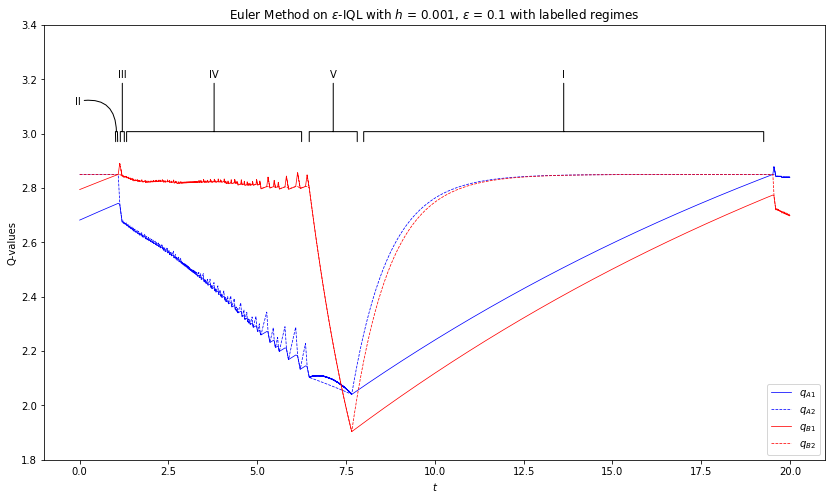

In [9]:
tmin = 60
tmax = 80
zoom1,zoom2 = int(tmin*n/T),int(tmax*n/T)


fig, ax = plt.subplots(1, figsize=longerfigsize)
# Plots of each component of particle over time
ax.plot(tt[0:zoom2 - zoom1], yyyzoom[zoom1:zoom2,0],'-',color = acolor,label='$q_{A1}$',linewidth = thinner_line)
ax.plot(tt[0:zoom2 - zoom1], yyyzoom[zoom1:zoom2,1],'--',color = acolor,label='$q_{A2}$',linewidth = thinner_line)
ax.plot(tt[0:zoom2 - zoom1], yyyzoom[zoom1:zoom2,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thinner_line)
ax.plot(tt[0:zoom2 - zoom1], yyyzoom[zoom1:zoom2,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thinner_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
plt.title("Euler Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {} with labelled regimes".format(tstep,eps))
ax.legend(loc = 'lower right')

figmax = 3.4
figmin = 1.8
yscaling = 1 / (figmax - figmin)
xscaling = 1 / (tmax - tmin)
correction = 0.035

fontsizer = 10.0
linewidth = 1
width, height = smallerfigsize[0],smallerfigsize[1]

ax.set_ylim(figmin,figmax)

regime_starts = [1.3,1.0,1.6,5.7,7.7,17.5] #doesn't correspond well
bracket_points = [.5*(regime_starts[i-1] + regime_starts[i]) for i in range(1,len(regime_starts))] 
scaled_bracket_starts = [(start) * xscaling + correction for start in bracket_points]

bracket_lengths = [.1,.2,8.75,2.4,20]
bracket_height = 3
bracket_height = (bracket_height - figmin) * yscaling

text_heights = [3.1] + 4*[3.2]
text_heights = [(th-figmin) * yscaling for th in text_heights]
regime_labels = ['II','III','IV','V','I']

for label, bracket_pos, bracket_len,text_h in zip(regime_labels,scaled_bracket_starts,bracket_lengths,text_heights):
    text_pos = bracket_pos
    angleB = 0
    connstyle=None
    if label == 'II':
        text_pos -= .05
        angleB = 0
        connstyle="arc3,rad=-.61"
    ax.annotate(label, xy=(bracket_pos, bracket_height), xytext=(text_pos, text_h), xycoords='axes fraction', 
            fontsize=fontsizer, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB={}, lengthB=1.'.format(bracket_len),
                            connectionstyle=connstyle, lw=linewidth))


II Betrayal and III Rapid Sliding

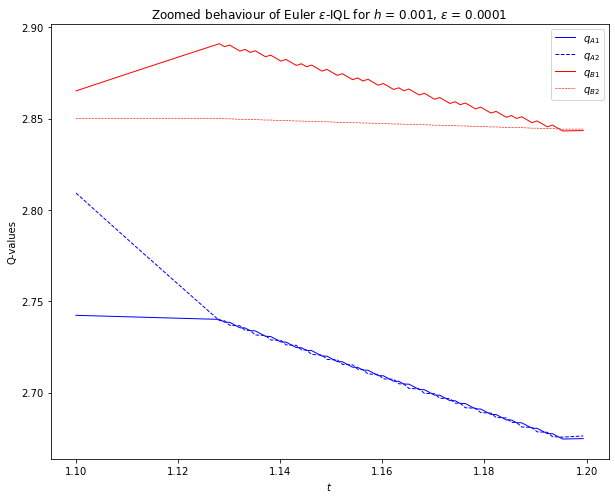

In [706]:
tmin = 60
tmax = 80
subtmin=1.1#.8
subtmax=1.2#1.5
zoomed_euler(yyyzoom,tmin+subtmin,tmin+subtmax,subtmin = subtmin)

III Opportunistic Defection

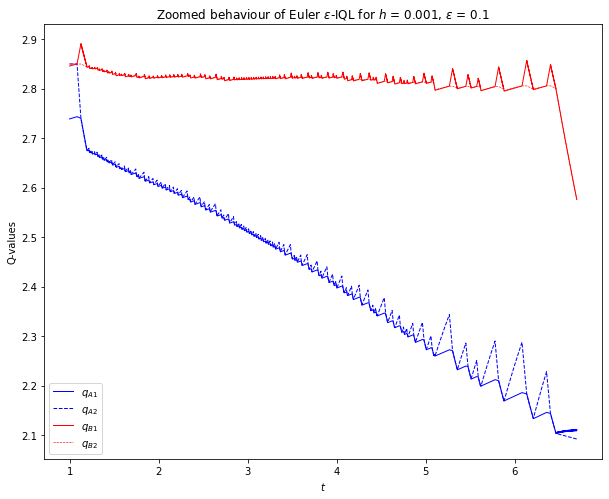

In [417]:
tmin = 60
tmax = 80
subtmin=1
subtmax=6.7
zoomed_euler(yyyzoom,tmin+subtmin,tmin+subtmax,subtmin = subtmin)

IV Stubborn Defection

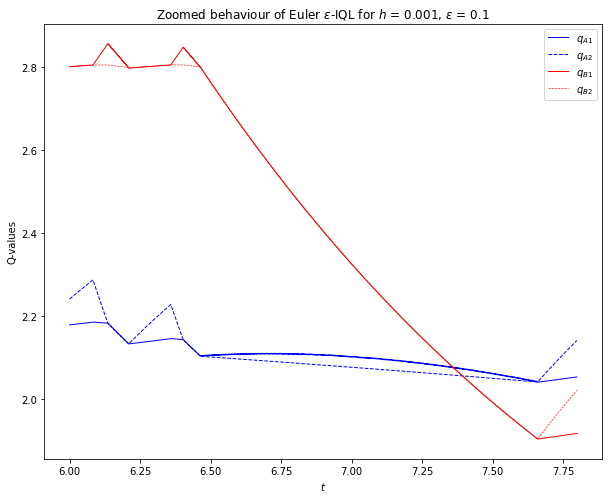

In [441]:
tmin = 60
tmax = 80
subtmin=6
subtmax=7.8
zoomed_euler(yyyzoom,tmin+subtmin,tmin+subtmax,subtmin = subtmin)

No single photo of I Mutual Cooperation

Very Closeup of Opportunistic Defection

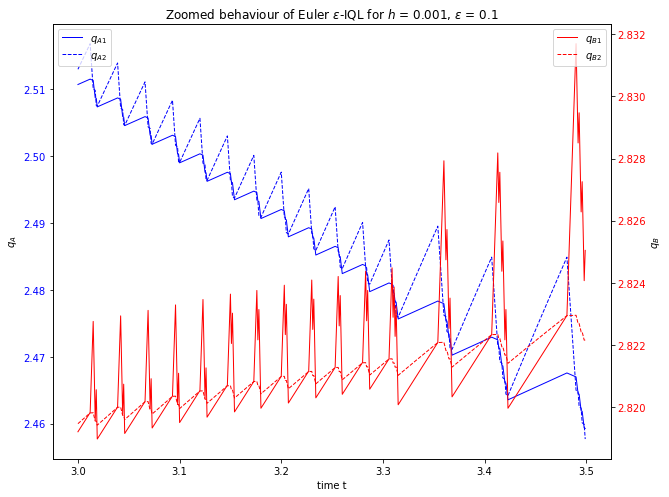

In [13]:
tmin = 60
tmax = 80
subtmin = 3
subtmax = 3.5
zoomed_euler_twin(yyyzoom,tmin+subtmin,tmin+subtmax,subtmin)

Very Closeup of Stubborn Defection

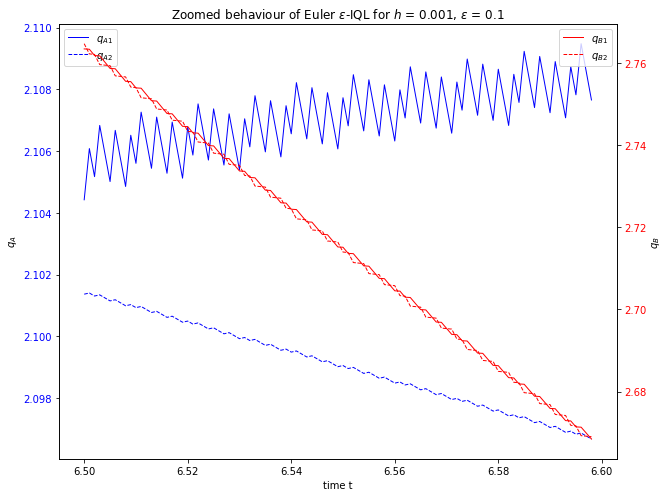

In [14]:
tmin = 60
tmax = 80
subtmin = 6.5
subtmax = 6.6
zoomed_euler_twin(yyyzoom,tmin+subtmin,tmin+subtmax,subtmin)

# Sliding Dynamics

In [601]:
def smoothIQL_vector(x,eps = 0):
    q = x[0]
    p = x[2]
    def sliding_diagonal_dot(q):
        return - q*(q-1) / (2*q - 1),- q*(q-1) / (2*q - 1)
    def sliding_p_dot(p,q):
        return (5*q - 4)/(2*q - 1) - p, 0
    return np.array([sliding_diagonal_dot(q),sliding_p_dot(p,q)]).reshape(4,)

#### Comparison with Rapid Sliding phase

Euler $\epsilon$-IQL comparison

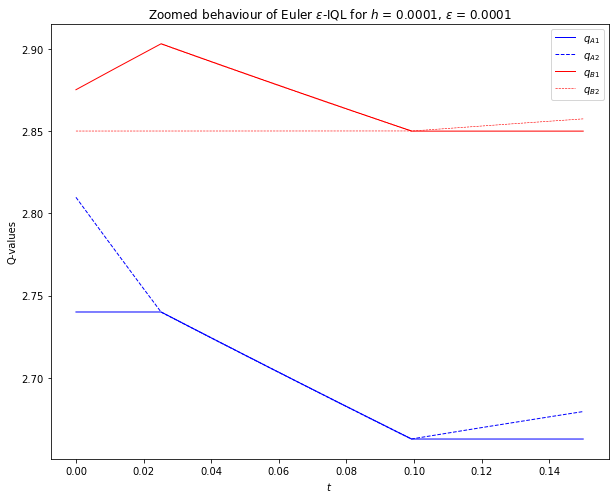

In [755]:
# Initial value
x0 = (2.74,2.81,2.875,2.85)
# Max time
T = .15
# time step (h in the notes).
tstep = 10**-4
# Value of greed 
eps = 0.0001
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyycomparison_rapid_sliding = euler_model(tstep,T,eps,x0)

zoomed_euler(yyycomparison_rapid_sliding,0,T)

Smoothed Euler $\epsilon$-IQL comparison

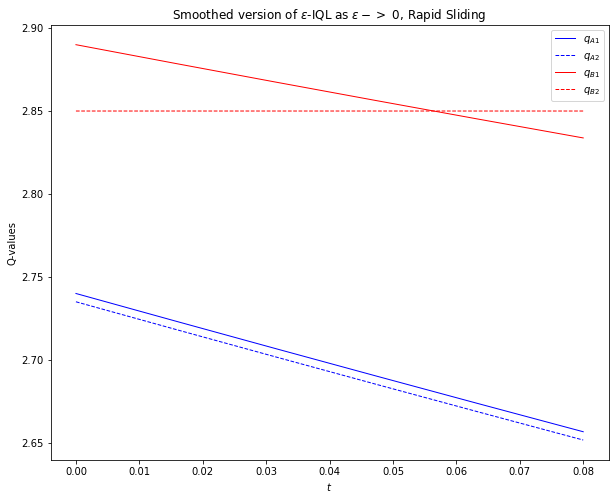

In [774]:
# Initial value
x0 = (2.74,2.735,2.89,2.85)
# Max time
T = .08
# time step (h in the notes).
tstep = 10**-5
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyysmooth = euler_model(tstep,T,x0=x0,vector = smoothIQL_vector)

fig, ax = plt.subplots(1, figsize=smallerfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyysmooth[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thicker_line)
ax.plot(tt, yyysmooth[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thicker_line)
ax.plot(tt, yyysmooth[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thicker_line)
ax.plot(tt, yyysmooth[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thicker_line)
ax.legend()
    
ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
plt.title("Smoothed version of $\epsilon$-IQL as $\epsilon ->$ 0, Rapid Sliding")
ax.legend()

#### Smooth comparison with Stubborn Defection phase

Euler $\epsilon$-IQL comparison

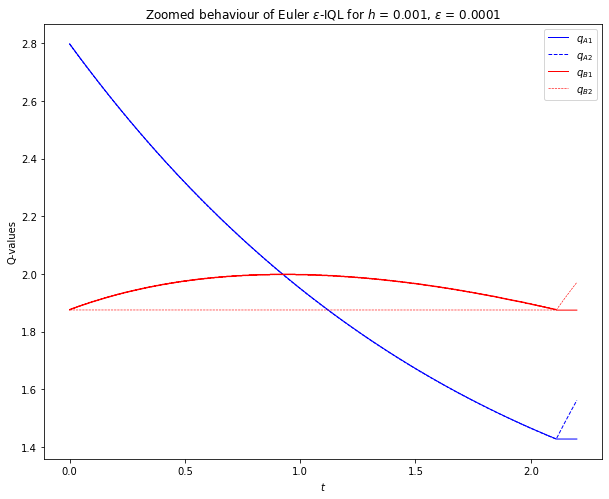

In [770]:
# Initial value
x0 = (2.8,2.799,1.876,1.875)
# Max time
T = 3
# time step (h in the notes).
tstep = 10**-3
# Value of greed 
eps = 0.0001
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyycomparison_stubborn_defect = euler_model(tstep,T,eps,x0)

zoomed_euler(yyycomparison_stubborn_defect,0,2.2)

Smoothed Euler $\epsilon$-IQL comparison

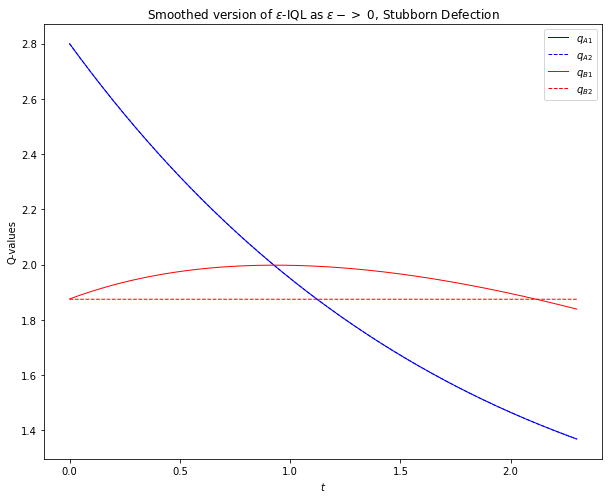

In [775]:
# Initial value
x0 = (2.8,2.8,1.876,1.875)
# Max time
T = 2.3
# time step (h in the notes).
tstep = 10**-5
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyysmooth = euler_model(tstep,T,x0 = x0,vector = smoothIQL_vector)

fig, ax = plt.subplots(1, figsize=smallerfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyysmooth[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thicker_line)
ax.plot(tt, yyysmooth[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thicker_line)
ax.plot(tt, yyysmooth[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thicker_line)
ax.plot(tt, yyysmooth[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thicker_line)
ax.legend()
    
ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
plt.title("Smoothed version of $\epsilon$-IQL as $\epsilon ->$ 0, Stubborn Defection")
ax.legend()

Plot of motion in $q_1q_2$-plane: Transient after 400 time units

Text(0, 0.5, '$q_{B2}$')

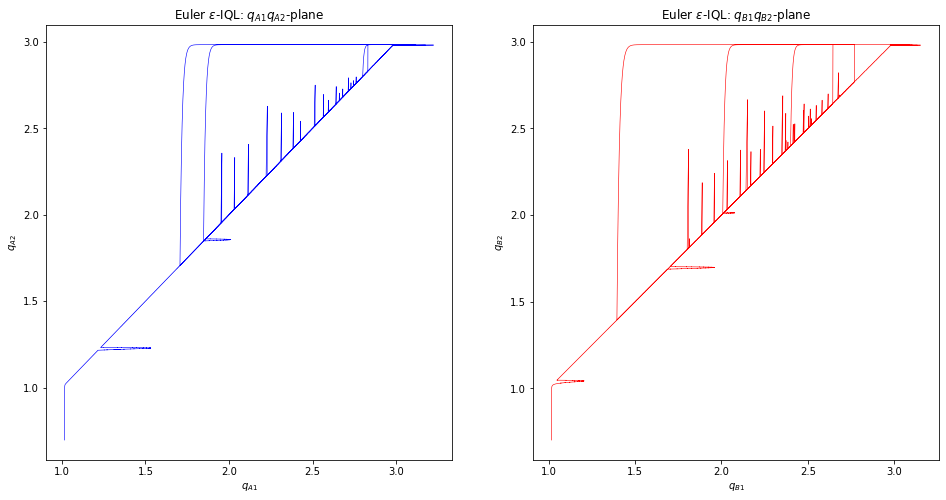

In [816]:
# Initial value
x0 = (2.8,2.801,2.4,2.401)
# Max time
T = 400
# time step (h in the notes).
tstep = 10**-3
# Value of greed 
eps = 0.011
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyyphase = euler_model(tstep,T,eps,x0)

fig, [ax1,ax2] = plt.subplots(1,2, figsize=largerfigsize)

# Values come from a previous simulation
# Plot of y over x as it orbits around \Sigma
ax1.plot(yyyphase[:,0],yyyphase[:,1],'-',color = acolor,lw = thinner_line)
ax1.set_title("Euler $\epsilon$-IQL: $q_{A1}q_{A2}$-plane")
ax1.set_xlabel('$q_{A1}$')
ax1.set_ylabel('$q_{A2}$')

# Values come from a previous simulation
# Plot of y over x as it orbits around \Sigma
ax2.plot(yyyphase[:,2],yyyphase[:,3],'-',color = bcolor,lw = thinner_line)
ax2.set_title("Euler $\epsilon$-IQL: $q_{B1}q_{B2}$-plane")
ax2.set_xlabel('$q_{B1}$')
ax2.set_ylabel('$q_{B2}$')

Plot of motion in $q_1q_2$-plane: No transience

Text(0, 0.5, '$q_{B2}$')

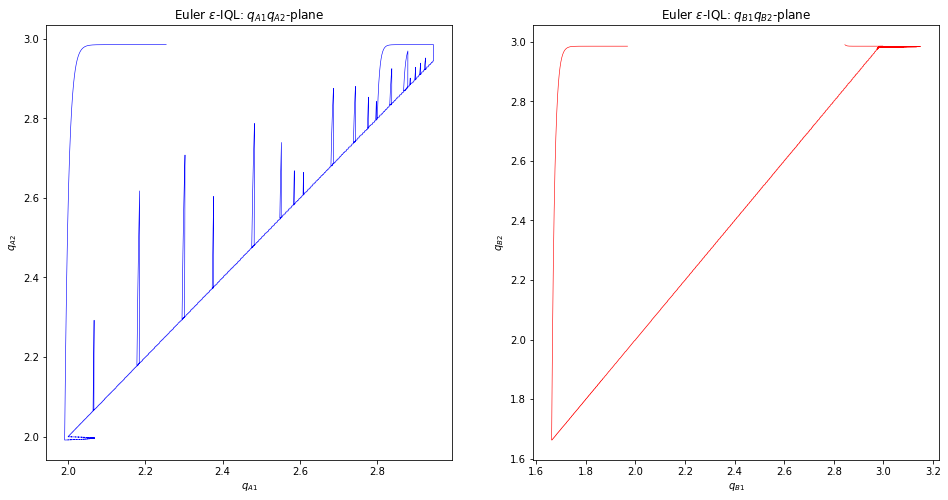

In [811]:
# Initial value
x0 = (2.8,2.801,2.845,2.99)
# Max time
T = 70
# time step (h in the notes).
tstep = 10**-3
# Value of greed 
eps = 0.01
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyyphase = euler_model(tstep,T,eps,x0)

fig, [ax1,ax2] = plt.subplots(1,2, figsize=largerfigsize)

# Values come from a previous simulation
# Plot of y over x as it orbits around \Sigma
ax1.plot(yyyphase[:,0],yyyphase[:,1],'-',color = acolor,lw = thinner_line)
ax1.set_title("Euler $\epsilon$-IQL: $q_{A1}q_{A2}$-plane")
ax1.set_xlabel('$q_{A1}$')
ax1.set_ylabel('$q_{A2}$')

# Values come from a previous simulation
# Plot of y over x as it orbits around \Sigma
ax2.plot(yyyphase[:,2],yyyphase[:,3],'-',color = bcolor,lw = thinner_line)
ax2.set_title("Euler $\epsilon$-IQL: $q_{B1}q_{B2}$-plane")
ax2.set_xlabel('$q_{B1}$')
ax2.set_ylabel('$q_{B2}$')

# Bilinear Method

In [22]:
rd = 5 #decimal places to which a & b are rounded before duplicates are removed from newton raphson method 
#rd needs to be quite small, otherwise it counts 0.999999 as being a legal a or b
nr_num = 10 #number of starting points of newton raphson
nr_maxiter = 100 #num of iterations of newton raphson
error = 0.1
tan_tol = 0.1

def f_i(x,v):
    return H1(x)*H2(x)*(f4(x,v)-f3(x,v)-f2(x,v) + f1(x,v)) + H1(x)*(f3(x,v) - f1(x,v)) + H2(x)*(f2(x,v) - f1(x,v)) + f1(x,v)

def norm_components(x,v):
    w = np.zeros((5,3),dtype = np.float64) # In (4,2) works, but this keeps it consistent with Dieci notation
    
    w[1,1:3] = f1(x,v)[0:2]
    w[2,1:3] = f2(x,v)[0:2]
    w[3,1:3] = f3(x,v)[0:2]
    w[4,1:3] = f4(x,v)[0:2]

    return w

def assumptions(x):
    w = norm_components(x,v)
    #print(w)
    # Assumption (a)
    #for i in range(1,5):
     #   print('i=',i)
      #  print(H(w[i][1]),H1(x))
       # print(H(w[i][2]),H2(x))
        #print(x)
        #print('w',w[i,:])
        #if H(w[i][1]) == H1(x) and H(w[i][2]) == H2(x):
         #   print('fails')
          #  return False
    # Assumption (b,c)
    bc = 0
    combos_i = [(2,4),(1,3),(3,4),(1,2)]
    ks = [1,1,2,2]
    
    def tan(k,i,j,n):
        if n in [1,3]:
            i,j = j,i #spaghetti code to make it work
        def otherk(k):
            if k == 1:
                return 2
            elif k ==2:
                return 1
        return w[i][otherk(k)]/w[i][k] - w[j][otherk(k)]/w[j][k]
    
    for (n,(k,(i,j))) in enumerate(zip(ks,combos_i)):
        #print(tan(k,i,j,n))
        if w[i][k] > 0 and w[j][k] < 0 and tan(k,i,j,n) < 0:
            #print('ijk',i,j,k)
            #print(tan(k,i,j,n))
            #print('w',w)
            if -tan_tol <= tan(k,i,j,n) < tan_tol: #first order exit condition
                return False
            bc += 1
    return (bc > 0)

def solver(x,v,debug = 0,solve_method = 'nr'):
    w = norm_components(x,v)
    
    def poly_solver(x,v,debug=0):
        # in this case of h1 and h2, w_i^k will be the first and second components of f_i
        a,b = sm.symbols("a b")
        
        P = ((1-b)*w[1][2] + b *w[2][2])*((1-b)*w[3][1] + b *w[4][1]) - ((1-b)*w[3][2] + b *w[4][2])*((1-b)*w[1][1] + b *w[2][1])
        Q = ((1-a)*w[1][1] + a *w[3][1])*((1-a)*w[2][2] + a *w[4][2]) - ((1-a)*w[2][1] + a *w[4][1])*((1-a)*w[1][2] + a *w[3][2])
        
        asolns = sm.simplify(sm.solve(sm.simplify(Q),a,simplify = False,rational = False,quick=True))
        bsolns = sm.simplify(sm.solve(sm.simplify(P),b,simplify = False,rational = False,quick=True))
        print('a',asolns)
        print('b',bsolns)

        h = sm.simplify(((1-a)*w[1][1] + a* w[3][1])/ ( (1-a) *w[1][1]+ a* w[3][1]  - ((1-a)*w[2][1] + a * w[4][1] )))
        g = sm.simplify(((1-b)*w[1][2] + b* w[2][2])/ ( (1-b) *w[1][2]+ b* w[2][2]  - ((1-b)*w[3][2] + b * w[4][2] )))
        
            #remove all solutions not in (0,1)
        asolns = [a for a in asolns if 0<a<1]
        bsolns = [b for b in bsolns if 0<b<1]

        all_hasolns = [h.subs(a,asoln) for asoln in asolns]
        all_gbsolns = [g.subs(b,bsoln) for bsoln in bsolns]
        print('all_asolns, all_gbsolns :',asolns,all_gbsolns)
        print('all_bsolns, all_hasolns :',bsolns,all_hasolns)
        
        return asolns,bsolns
    
    def newton_raphson_solver(x,v,debug = 0):
    
        def P(b):
            return ((1-b)*w[1][2] + b *w[2][2])*((1-b)*w[3][1] + b *w[4][1]) - ((1-b)*w[3][2] + b *w[4][2])*((1-b)*w[1][1] + b *w[2][1])
    
        def Q(a):
            return ((1-a)*w[1][1] + a *w[3][1])*((1-a)*w[2][2] + a *w[4][2]) - ((1-a)*w[2][1] + a *w[4][1])*((1-a)*w[1][2] + a *w[3][2])
        def nr(poly,start):
            return optimize.newton(poly,start,maxiter = nr_maxiter)
    
        #round all the found asolns of Q to the nearest rd decimal place, and remove duplicates (should give list of size 2)
        asolns = list(set([round(nr(Q,a0),rd) for a0 in np.linspace(-1,2,nr_num)]))
        bsolns = list(set([round(nr(P,b0),rd) for b0 in np.linspace(-1,2,nr_num)]))
        return asolns,bsolns
    
    
    if solve_method == 'nr':
        solns = newton_raphson_solver
    if solve_method == 'poly':
        solns = poly_solver
    asolns,bsolns = solns(x,v)
    
    all_asolns,all_bsolns = asolns,bsolns #for debug

        
    def h(a):
        return ((1-a)*w[1][1] + a* w[3][1])/ ( (1-a) *w[1][1]+ a* w[3][1]  - ((1-a)*w[2][1] + a * w[4][1] ))
    def g(b):
        return ((1-b)*w[1][2] + b* w[2][2])/ ( (1-b) *w[1][2]+ b* w[2][2]  - ((1-b)*w[3][2] + b * w[4][2] ))
    
    #remove all solutions not in (0,1)
    asolns = [a for a in asolns if 0<a<1]
    bsolns = [b for b in bsolns if 0<b<1]

    hasolns = [h(asoln) for asoln in asolns]
    gbsolns = [g(bsoln) for bsoln in bsolns]
    for ha in hasolns:
        if math.isnan(ha):
            return asolns[0],bsolns[0]
    
    def rel_intersect(list1,list2,inter_error =1e-1):
    #returns the intersection of two sets, with elements equal within some error
    #(only works properly for sets of size 2)
        intersection = []
        for a in list1:
            for b in list2:
                if abs(a-b)<inter_error:
                    intersection += [a]
        return intersection
    #these should both be lists of size one
    legal_asolns = rel_intersect(asolns,gbsolns,error)
    legal_bsolns = rel_intersect(bsolns,hasolns,error)
    
    if debug:
        print('x =',x)
        all_hasolns = [h(asoln) for asoln in all_asolns]
        all_gbsolns = [g(bsoln) for bsoln in all_bsolns]
        
        print('all_asolns, all_gbsolns :',all_asolns,gbsolns)
        print('all_bsolns, all_hasolns :',all_bsolns,hasolns)
        print('x =',x)
        print('asolns =',asolns)
        print('hasolns =',hasolns)
        print('bsolsn=',bsolns)
        print('gbsolns =',gbsolns)
        print('legal a',legal_asolns)
        print('legal b',legal_bsolns)
        
    if len(legal_asolns) != 1 or len(legal_bsolns) != 1:
        print('x =',x)
        all_hasolns = [h(asoln) for asoln in all_asolns]
        all_gbsolns = [g(bsoln) for bsoln in all_bsolns]
        
        print('all_asolns, all_gbsolns :',all_asolns,all_gbsolns)
        print('all_bsolns, all_hasolns :',all_bsolns,all_hasolns)
        print('asolns =',asolns)
        print('hasolns =',hasolns)
        print('bsolsn=',bsolns)
        print('gbsolns =',gbsolns)
        print('legal a',legal_asolns)
        print('legal b',legal_bsolns)
        
        return 'More than one or no valid (a,b)'
    else:
        return legal_asolns[0],legal_bsolns[0]

def bilinear(x,r,v,solve_method='nr',debug = 0):
    #fuzzify vector field around a r-neighbourhood of \Sigma according to bilinear model
    if abs(h1(x)) < r and abs(h2(x)) < r and assumptions(x):
        solns = solver(x,v,solve_method=solve_method,debug=debug)
        if solns == 'More than one or no valid (a,b)':
            velocity = f_i(x,v)
        else:
            a,b = solns[0],solns[1]
            F_B = (1-a)*(1-b)*f1(x,v) + (1-a)*b*f2(x,v) + a*(1-b)*f3(x,v) + a*b*f4(x,v)
            velocity = F_B
    else:
        velocity = f_i(x,v) #gives the vector field of R_i if outside the fuzzy nbd of \Sigma
    return velocity

def bi_model(tstep,T,r,v,x0 = (1,2,1),solve_method ='nr',debug = 0):
    n = int(T/tstep)
    tt = np.linspace(0, T, n)
    yy = np.zeros((n,len(x0)))+x0
    for i,t in enumerate(tqdm(tt,position=0,leave = False,desc = 'bilinear model')):
        velocity = bilinear(yy[i-1,:],r,v,solve_method=solve_method,debug=debug)
        yy[i,:] = yy[i-1,:] + tstep*velocity
    return yy

In [23]:
# Initial value
x0 = 1,2,1
# Max time
T = 10
# time step (h in the notes)
tstep = 10**-3/np.pi
# Length of time interval averaged over
r =  tstep*1
# z component of vector field in R2 and R3
v = -1
# Number of iterations
n = int(T/tstep)

tt = np.linspace(0, T, n)
yyy = bi_model(tstep,T,r,v,x0,solve_method='nr')

fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yyy[:,0],color = xcolor,label='x')
ax.plot(tt, yyy[:,1],color = ycolor,label='y')
ax.plot(tt, yyy[:,2],color = zcolor,label='z')
ax.set_xlabel('$t$')
plt.title("Bilinear Method on toy model $h$ = {}, $r$ = {}, v = {}".format(tstep,r,v))
ax.legend()

bilinear model:  19%|███████████                                                | 5877/31415 [00:00<00:03, 8468.90it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in double_scalars
bilinear model:  37%|█████████████████████▉                                     | 11667/31415 [00:13<00:38, 507.53it/s]

KeyboardInterrupt: 

In [1]:
# Values come from previous simulation
plt.figure(figsize=defaultfigsize)
# Plot of y over x as it orbits around \Sigma
plt.plot(yyy[int(2*n/T):-1,0],yyy[int(2*n/T):-1,1],'-',color = xycolor)
plt.title("Bilinear Method on toy model with $\phi$ = {}: xy-plane")
plt.xlabel('x')
plt.ylabel('y')

NameError: name 'plt' is not defined

# Time Delay Method

In [18]:
opportunistic_defection_start = (2.83,2.85,2.73,2.85)
opportunistic_defection_later = (2.85,2.85,2.68,2.68)#(2.8285,2.8270,2.635,2.636)
bjorns_start = (2.8,2.801,2.845,2.99)
bjorns_dual_slide_start = (2.86515512, 2.86515512,2.78737338, 2.78737338)
debug_bi_start = (2.7937573,  2.79373824, 2.20117745, 2.20118088)

In [19]:
# Reward matrix when players defect/cooperate
# (e.g. first player cooperating and second defecting would give reward
# of 0 to first player and 4 to second player)
reward = np.array([[1,4],[0,3]])

# The value of 'epsilon' in epsilon-greedy
eps = 0.1

# Epislon-greedy policies when defecting/cooperating greedily
# PD, PC
policy = np.array([[1-eps/2,eps/2], [eps/2,1-eps/2]])

# Conversion between q and z coordinates
# (rotate q by -45 degrees to transform to z)
# (z[0] measures distance to diagonal, z[1] measures distance along diagonal)
ztoq = np.array([[1,-1],[1,1]]) / np.sqrt(2)
qtoz = ztoq.transpose()

# The coop/coop vector field is tangent to the diagonal at (qc,qc) and
# the defect/defect vector field is tangent to the diagonal at (qd,qd).
qd, qc = [(policy[i] * (reward @ policy[i])).dot([-1,1])/policy[i].dot([-1,1]) for i in range(2)]

xd, _ = qtoz @ [qd,qd]
xc, _ = qtoz @ [qc,qc]

# Vector field in q coordinates when the greedy actions for each players are given by the pair 'greedy'
# (e.g. 'greedy=(1,0)' means player one/two cooperates/defects greedily)
def qdot(q, greedy):
    pi0, pi1 = policy[greedy[0]], policy[greedy[1]]
    return np.array([pi0 * (reward @ pi1 - q[0]), pi1 * (reward @ pi0 - q[1])]).reshape(4,)

# The vector field in z coordinates
def zdot(z, greedy):
    qd0, qd1 = qdot((ztoq @ z[0], ztoq @ z[1]), greedy)
    return qtoz @ qd0, qtoz @ qd1


def qdot_all(z):
    #v = [np.concatenate(zdot(z, g)) for g in [(1,1),(0,1),(0,0),(1,0)]]
    #return np.column_stack(v)
    return [qdot(z, g) for g in [(0,0),(0,1),(1,0),(1,1)]]


# Calculate zdot for all quadrants in counterclockwise direction
# (first quadrant corresponds to both players cooperating,
# second quadrant corresponds to first player defecting and second player cooperating, etc.)
def zdot_all(z):
    #v = [np.concatenate(zdot(z, g)) for g in [(1,1),(0,1),(0,0),(1,0)]]
    #return np.column_stack(v)
    return [zdot(z, g) for g in [(1,1),(0,1),(0,0),(1,0)]]
def dA(x):
    return x[1]-x[0] # > 0 means A is cooperating, g = 1
def dB(x):
    return x[3]-x[2]
def which_quadrant(x):
    if dA(x) > 0 and dB(x) >= 0:
        return 0
    if dA(x) <= 0 and dB(x) > 0:
        return 1
    if dA(x) < 0 and dB(x) <= 0:
        return 2
    if dA(x) >= 0 and dB(x) < 0:
        return 3
    else:
        return 10

def qdot_all_dieci_convention(x):
    #v = [np.concatenate(zdot(z, g)) for g in [(1,1),(0,1),(0,0),(1,0)]]
    #return np.column_stack(v)
    #return [qdot(x, g) for g in [(1,1),(0,1),(1,0),(0,0)]]
    return (qdot(x, g) for g in [(1,1),(0,1),(1,0),(0,0)])

In [20]:
def H(x):
    if x >= 0: #this = might actually be doing a lot, defaulting to R4
        return 1
    else:
        return 0

# difference of qa values
def h1(x):
    return x[1] - x[0]
# difference of qb values
def h2(x):
    return x[3] - x[2]

# heaviside of difference of qa values
def H1(x): 
    return H(h1(x))
# heaviside of difference of qb values
def H2(x):
    return H(h2(x))

# sets initial value
def values_before_zero(t):
    x = np.array([qa10,qa20,qb10,qb20])
    return x

def f1(x): # h1,h2< 0 i.e. both players defecting
    return qdot((x[0:2],x[2:4]), (0,0))
def f2(x): # h1<0,h2>0 i.e. defecting,cooperating
    return qdot((x[0:2],x[2:4]), (0,1))
def f3(x): # h1>0,h2<0 i.e. cooperating,defecting
    return qdot((x[0:2],x[2:4]), (1,0))
def f4(x): # h1,h2> 0 i.e. both players cooperating
    return qdot((x[0:2],x[2:4]), (1,1))

def integrand(x):
    return H1(x)*H2(x)*(f4(x)-f3(x)-f2(x) + f1(x)) + H1(x)*(f3(x) - f1(x)) + H2(x)*(f2(x) - f1(x)) + f1(x)

def integrand0(x):
    return integrand(x)[0]

def integrand1(x):
    return integrand(x)[1]

def integrand2(x):
    return integrand(x)[2]

def integrand3(x):
    return integrand(x)[3]


integrands = [integrand0,integrand1,integrand2,integrand3]

def integrate_avg(yy,t,delta,debug = False):
    # take average of the velocity of each particle in the previous t-delta time steps up 
    def integral(inte,int_range,t_range):
        
        vector_field_over_last_t_minus_delta = np.apply_along_axis(inte,1,int_range) 
        
        if debug:
            #print('t length =',len(t_range))
            print('integrand(x) = ',np.apply_along_axis(lambda x: integrand(x),1,int_range))
            #print('ratio=',len(t_range)*tstep/delta)
            #print('time_range=',t_range)
            #print('diff',t_range[-1] - t_range[0])
            #print('int_range',int_range)
            #print('shape x',np.shape(int_range[0]))
            
        return np.sum(vector_field_over_last_t_minus_delta,axis = 0)/len(int_range)
    
    # i = position of t in tt
    if np.where(tt == t) == []:
        raise Exception('No such value of t in tt')
    i = np.where(tt == t)[0][0]
    # j = position of t-delta in tt (rounded)
    j = np.argmin(np.abs((t-delta) - tt)) #- 1 #position of closest element in tt to t - delta
    difference = tt[0] - (t-delta) # if t - delta is less than the lowest in tt, we have to create new values

    if difference >= 0:
        prev_time = np.arange(t-delta, tstep ,tstep) #time range before zero
        prev_vals = np.row_stack([values_before_zero(t) for t in prev_time]) #values before zero
        
        time_range = np.hstack((prev_time,tt[0:i])) # all the time values in the relevant range (t-delta up to t) 
        integration_range = np.vstack((prev_vals,yy[0:i])) #the actual values of the particle over the relevant time

        avgs = []
        for inte in integrands:
            avgs +=  [integral(inte,integration_range,time_range)]## this might have to be len(integration_range)*tstep
        return np.array(avgs)

    elif difference < 0:
        time_range = tt[j:i]
        integration_range = yy[j:i]

        avgs = []
        for inte in integrands:
            #print('int=',integral(inte,integration_range,time_range))
            avgs +=  [integral(inte,integration_range,time_range)]
        return np.array(avgs)
    else:
        print('error')
        
        
def model(tt,delta,debug = 0):
    yy = np.zeros((n,4))+values_before_zero(0)
    for i,t in enumerate(tqdm(tt,position=0,leave = False,desc = 'model')):
        velocity = integrate_avg(yy,t,delta,debug = debug)
        if debug:
            print('velocity =',velocity)
        yy[i,:] = yy[i-1,:] + tstep*velocity
    return yy
    return yy

[2.80151551 2.80151551] [2.72373377 2.72373377]
2.86515512 2.86515512 2.78737338 2.78737338
n = 2000


Text(0.5, 1.0, 'Discrete Time Delay Method on $\\epsilon$-IQL with $h$ = 0.01, $\\epsilon$ = 0.1, $\\delta$ = 0.5')

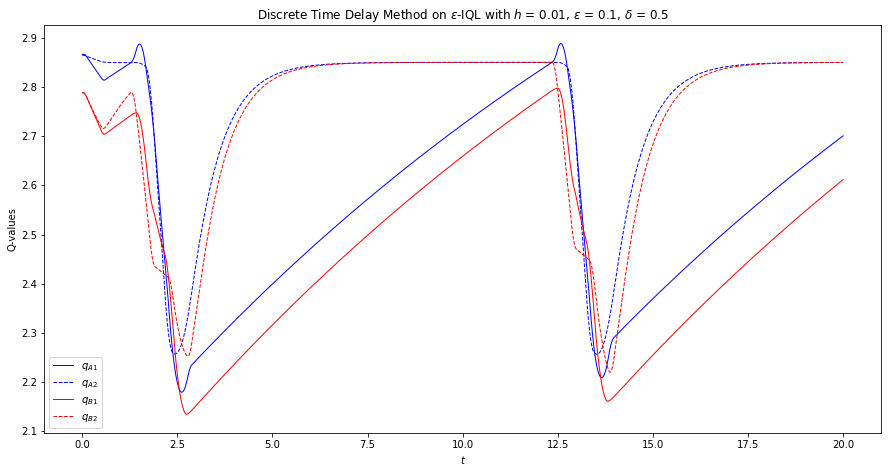

In [33]:
debug = 0

# Initial value
x0 = (2.8,2.801,2.845,2.99)
# Max time
T = 20
# time step (h in the notes).
tstep = 10**-2#10**-5 +10**-4*2.5 #(10**-5 +10**-4*2.5)*50
# delay delta
delta = 10**-1 * 5#*np.pi*3#(10**-5 +10**-4*2.5)*1001.2345
# Value of greed 
eps = 0.1
# Number of iterations
n = int(T/tstep)


a,b = ztoq @ (xc+eps/10,0), ztoq @ (xc-eps,0)
print(a,b)
qa10,qa20,qb10,qb20 = bjorns_dual_slide_start  #opportunistic_defection_start
print(qa10,qa20,qb10,qb20)

n = int(T/tstep)
print('n =',n)

tt = np.linspace(0, T, n)
yy_delay = model(tt,delta,debug = debug)


fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt, yy_delay[:,0],'-',color = acolor,label='$q_{A1}$',linewidth = thicker_line)
ax.plot(tt, yy_delay[:,1],'--',color = acolor,label='$q_{A2}$',linewidth = thicker_line)
ax.plot(tt, yy_delay[:,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thicker_line)
ax.plot(tt, yy_delay[:,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thicker_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
ax.legend()
plt.title("Discrete Time Delay Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}, $\delta$ = {}".format(tstep,eps,delta))


Text(0.5, 1.0, 'Discrete Time Delay Method on $\\epsilon$-IQL with $h$ = 0.01, $\\epsilon$ = 0.1, $\\delta$ = 0.5')

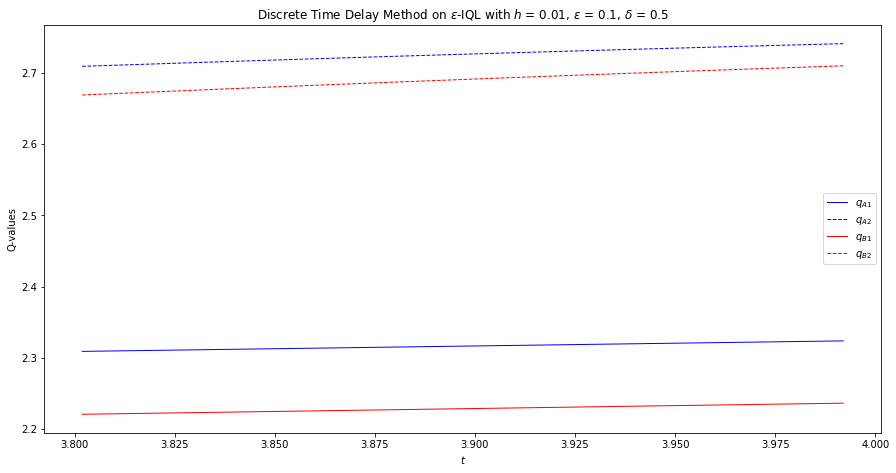

In [35]:
zoom2,zoom = int(3.8*n/T),int(4*n/T)


fig, ax = plt.subplots(1, figsize=defaultfigsize)
# Plots of each component of particle over time
ax.plot(tt[zoom2:zoom], yy_delay[zoom2:zoom,0],'-',color = acolor,label='$q_{A1}$',linewidth = thicker_line)
ax.plot(tt[zoom2:zoom], yy_delay[zoom2:zoom,1],'--',color = acolor,label='$q_{A2}$',linewidth = thicker_line)
ax.plot(tt[zoom2:zoom], yy_delay[zoom2:zoom,2],'-',color = bcolor,label='$q_{B1}$',linewidth = thicker_line)
ax.plot(tt[zoom2:zoom], yy_delay[zoom2:zoom,3],'--',color = bcolor,label='$q_{B2}$',linewidth = thicker_line)

ax.set_xlabel('$t$')
ax.set_ylabel('Q-values')
ax.legend()
plt.title("Discrete Time Delay Method on $\epsilon$-IQL with $h$ = {}, $\epsilon$ = {}, $\delta$ = {}".format(tstep,eps,delta))
